### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 6.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [3]:
target = new_client.target
target_query = target.search('kidney')
target_result = pd.DataFrame.from_dict(target_query)

In [4]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Kidney,17.0,False,CHEMBL613579,[],TISSUE,10090
1,[],Rattus norvegicus,Kidney,17.0,False,CHEMBL613638,[],TISSUE,10116
2,[],Mus musculus,"Glutaminase kidney isoform, mitochondrial",15.0,False,CHEMBL4523110,"[{'accession': 'D3Z7P3', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Homo sapiens,"Glutaminase kidney isoform, mitochondrial",14.0,False,CHEMBL2146302,"[{'accession': 'O94925', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Rattus norvegicus,"Glutaminase kidney isoform, mitochondrial",14.0,False,CHEMBL4523186,"[{'accession': 'P13264', 'component_descriptio...",SINGLE PROTEIN,10116
...,...,...,...,...,...,...,...,...,...
74,[],Mus musculus,Oxytocin receptor,3.0,False,CHEMBL3243907,"[{'accession': 'P97926', 'component_descriptio...",SINGLE PROTEIN,10090
75,[],Gallus gallus,Oxytocin-like receptor,3.0,False,CHEMBL3243915,"[{'accession': 'Q5D7U5', 'component_descriptio...",SINGLE PROTEIN,9031
76,[],Mus musculus,Vasopressin V1a receptor,3.0,False,CHEMBL3414410,"[{'accession': 'Q62463', 'component_descriptio...",SINGLE PROTEIN,10090
77,[],Homo sapiens,Vasopressin V1a/V2,3.0,False,CHEMBL4523980,"[{'accession': 'P30518', 'component_descriptio...",SELECTIVITY GROUP,9606


In [5]:
selected_target1 = target_result.target_chembl_id[3]
selected_target1

'CHEMBL2146302'

In [6]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [7]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,12142692,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,12142693,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,48.0
2,None,12142694,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,100.0


### Only Selecting the required Columns

In [8]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [9]:
df1_selected = df1[columns]

In [10]:
len(df1_selected)

1125

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [11]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        1
dtype: int64

In [12]:
df1_selected['standard_value'].dtype

dtype('O')

In [13]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-13-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [14]:
df1_selected['standard_value'].dtype

dtype('float64')

In [15]:
df1_selected['standard_value'].head(3)

0    100000.0
1     48000.0
2    100000.0
Name: standard_value, dtype: float64

In [16]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [18]:
if df1_selected['canonical_smiles'].isnull().sum() > 0:
  df1_selected = df1_selected.dropna(axis=0)

In [19]:
len(df1_selected)

1125

In [20]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [21]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [22]:
df1_selected.describe()

,standard_value
count,1125.000000
mean,5405.407034
std,14986.586118
min,0.100000
25%,19.000000
50%,160.000000
75%,1800.000000
max,100000.000000


In [23]:
df1_selected['standard_value'] = norm_val(df1_selected)

<ipython-input-23-1651fe78b754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = norm_val(df1_selected)


In [24]:
df1_selected['standard_value'] = convert_log(df1_selected)

<ipython-input-21-31a96a23224e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
<ipython-input-24-dc51576c3f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = convert_log(df1_selected)


In [25]:
df1_selected['standard_value'].head()

0    8.091947
1    4.318759
2    8.091947
3    5.283997
4    8.080679
Name: standard_value, dtype: float64

In [26]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [27]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Creating labels and features

In [28]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [29]:
len(df1_x),len(df1_y)

(1125, 1125)

In [30]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('kidney_labels.csv',index=False)

### A quick look at files

In [31]:
! ls

kidney_labels.csv  molecule.smi  sample_data


In [32]:
! cat molecule.smi | head -5

O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(F)F)cc1	CHEMBL2177756
CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2)cc1	CHEMBL2177755
O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1	CHEMBL2177754
CN(C(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1)C(C)(C)C	CHEMBL2177753
CC(C)(C)NC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1	CHEMBL2177752


### Using padel Descriptor to break it into dataset form

In [33]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-10 12:30:07--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-10 12:30:07--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   161MB/s    in 0.2s    

2023-03-10 12:30:07 (161 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-10 12:30:08--  https://github

In [34]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [35]:
! bash padel.sh

Processing CHEMBL2177756 in molecule.smi (1/1125). 
Processing CHEMBL2177755 in molecule.smi (2/1125). 
Processing CHEMBL2177753 in molecule.smi (4/1125). Average speed: 3.83 s/mol.
Processing CHEMBL2177754 in molecule.smi (3/1125). Average speed: 7.48 s/mol.
Processing CHEMBL2177752 in molecule.smi (5/1125). Average speed: 2.89 s/mol.
Processing CHEMBL2177751 in molecule.smi (6/1125). Average speed: 2.18 s/mol.
Processing CHEMBL2177750 in molecule.smi (7/1125). Average speed: 1.91 s/mol.
Processing CHEMBL2177749 in molecule.smi (8/1125). Average speed: 1.62 s/mol.
Processing CHEMBL2177748 in molecule.smi (9/1125). Average speed: 1.44 s/mol.
Processing CHEMBL2177747 in molecule.smi (10/1125). Average speed: 1.36 s/mol.
Processing CHEMBL2177746 in molecule.smi (11/1125). Average speed: 1.23 s/mol.
Processing CHEMBL2177745 in molecule.smi (12/1125). Average speed: 1.16 s/mol.
Processing CHEMBL2177744 in molecule.smi (13/1125). Average speed: 1.06 s/mol.
Processing CHEMBL2177743 in molecu

### Model selection and usage

### Importing Modules

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,OrthogonalMatchingPursuit,LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Using different models and importing processed data 

In [37]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('kidney_labels.csv')

In [38]:
len(X),len(Y)

(1125, 1125)

In [39]:
Y['standard_value'].isnull().sum()

0

In [40]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [41]:
Y.standard_value.unique()

array([ 8.09,  4.32,  5.28,  8.08,  8.34,  8.27,  8.29,  5.59,  4.66,
        5.14,  5.72,  4.21,  6.14,  8.13,  6.31,  6.1 ,  6.  ,  8.17,
        5.01,  6.64,  5.27,  7.01,  5.51,  6.43,  7.2 ,  5.66,  7.36,
        7.15,  8.41,  9.41,  9.4 ,  6.76,  9.69,  8.3 ,  6.35,  5.24,
        8.35,  6.15,  8.26,  7.02,  8.22,  6.32,  8.15,  7.08,  8.1 ,
        8.14,  8.21,  8.18,  7.28,  8.12,  5.39,  5.18,  5.25,  4.74,
        5.43,  5.1 ,  4.44,  5.04,  4.4 ,  6.16,  5.21,  5.37,  6.02,
        5.62,  5.46,  6.47,  5.2 ,  5.06,  5.36,  5.16,  6.09,  4.8 ,
        6.05,  8.19,  4.68,  6.17,  8.28,  7.1 ,  7.16,  7.13,  7.07,
        5.07,  5.  ,  6.12,  5.31,  6.99,  7.35,  6.61,  7.46,  7.41,
        7.27,  7.18,  7.23,  5.89,  6.42,  6.82,  6.45,  6.83,  7.06,
        6.41,  6.66,  6.75,  6.59,  9.3 ,  8.57, 10.  ,  9.7 ,  4.99,
        8.2 ,  5.97,  6.03,  5.56,  5.91,  5.86,  6.07,  6.11,  5.95,
        5.9 ,  6.01,  6.38,  6.87,  6.69,  6.46,  6.06,  5.22,  8.11,
        6.94,  5.68,

In [42]:
Y.describe()

,standard_value
count,1125.000000
mean,7.867867
std,0.721748
min,4.210000
25%,8.090000
50%,8.090000
75%,8.090000
max,10.000000


In [43]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [44]:
X.head(5)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Y[:5]

array([8.09, 4.32, 8.09, 5.28, 8.08])

In [46]:
X.shape

(1125, 881)

### Defining all the Regressors

In [47]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
oth = OrthogonalMatchingPursuit()

In [48]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r2 = r2_score(y,predictions)
    return mae,mse,rmse,r2

### Using different regressors and finding best fit model for our dataset

In [49]:
rmse_arr = []
r2_arr=[]

### Random Forest Tree

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.003902785096443706

Mean Sqaured Error : 0.5445431337246783

Mean Absolute Error : 0.4140096157968814

Root Mean Squared : 0.7379316592508268


### Decision Tree Regressor

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.6420286888238278

Mean Sqaured Error : 0.890679317910301

Mean Absolute Error : 0.45517888053467054

Root Mean Squared : 0.9437580823019748


### Support Vector Regressor

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.025495626522142656

Mean Sqaured Error : 0.5562556558040354

Mean Absolute Error : 0.33112255578820265

Root Mean Squared : 0.7458254861588167


### Extra Tree Regression

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
etree.fit(X_train,Y_train)
Y_pred = etree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.4870674249597915

Mean Sqaured Error : 0.8066242744507367

Mean Absolute Error : 0.4447864953494866

Root Mean Squared : 0.8981226388699578


### Lasso Regression

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.006405383406541398

Mean Sqaured Error : 0.5459006085185187

Mean Absolute Error : 0.4369514567901213

Root Mean Squared : 0.7388508702833873


### Ridge Regression

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.07275932283648623

Mean Sqaured Error : 0.5818927211499112

Mean Absolute Error : 0.4820966049416652

Root Mean Squared : 0.7628189307757846


### Orthogonal Matching Pursuit Regressor

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.07642116176364366

Mean Sqaured Error : 0.5838789983813243

Mean Absolute Error : 0.5013077892095956

Root Mean Squared : 0.7641197539530857


### Linear Regression

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -5.53877263269526e+19

Mean Sqaured Error : 3.004375175736374e+19

Mean Absolute Error : 1215656120.9093435

Root Mean Squared : 5481218090.658658


### Model Performance

In [58]:
import seaborn as sns

In [59]:
di = {"Name":["Random Forest","Decision Tree","Support Vector","Extra Tree","Lasso","Ridge","Orthogonal","Linear"],
      "RMSE":rmse_arr,"R_Sq":r2_arr}

In [60]:
model_performance = pd.DataFrame.from_dict(di)

In [61]:
model_performance

,Name,RMSE,R_Sq
0,Random Forest,7.379317e-01,-3.902785e-03
1,Decision Tree,9.437581e-01,-6.420287e-01
2,Support Vector,7.458255e-01,-2.549563e-02
3,Extra Tree,8.981226e-01,-4.870674e-01
4,Lasso,7.388509e-01,-6.405383e-03
5,Ridge,7.628189e-01,-7.275932e-02
6,Orthogonal,7.641198e-01,-7.642116e-02
7,Linear,5.481218e+09,-5.538773e+19


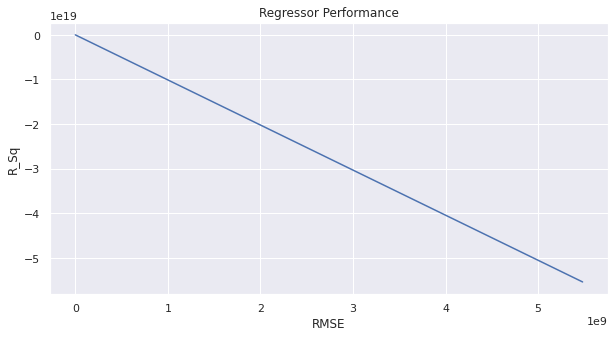

In [62]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='RMSE',y='R_Sq',data=model_performance).set(title='Regressor Performance')

### Using model with lowest rmse

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [64]:
rmse

0.7381616541708522

### Saving model state for later use

In [65]:
import pickle

pickle.dump(rfe,open("kidney_model.pkl","wb"))